#Bioinformatics Visualization - cancer_expression

In [76]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
#load dataset
url = 'https://raw.githubusercontent.com/Illiyas124/CSH4123-Bioinformatics-practical/refs/heads/main/cancer_expression.csv'
df = pd.read_csv(url)

In [78]:
df.head(10)

,Gene,Control1,Control2,Control3,Control4,Control5,Control6,Control7,Control8,Control9,...,Treatment6,Treatment7,Treatment8,Treatment9,Treatment10,Treatment11,Treatment12,Treatment13,Treatment14,Treatment15
0,Gene1,56,97,19,76,65,25,87,91,79,...,63,46,96,64,84,19,66,66,51,66
1,Gene2,8,93,64,18,13,94,57,6,88,...,48,38,78,66,18,99,52,19,76,82
2,Gene3,64,45,33,19,49,69,93,75,13,...,27,66,92,41,48,90,95,39,69,51
3,Gene4,94,46,81,55,67,56,8,98,27,...,66,79,96,93,66,5,31,66,81,7
4,Gene5,63,36,92,56,66,62,56,16,43,...,79,60,21,42,28,73,74,90,15,20
5,Gene6,94,71,23,24,75,56,37,44,43,...,36,13,23,52,84,7,24,28,58,37
6,Gene7,86,70,58,39,84,65,45,37,72,...,31,25,34,32,68,73,65,52,23,8
7,Gene8,41,28,97,50,57,99,64,67,89,...,37,13,47,52,43,97,46,30,54,29
8,Gene9,20,18,80,91,19,96,70,36,91,...,9,72,10,98,51,59,44,56,20,17
9,Gene10,66,27,13,16,5,62,5,38,52,...,98,66,73,80,20,94,94,52,89,43


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gene         100 non-null    object
 1   Control1     100 non-null    int64 
 2   Control2     100 non-null    int64 
 3   Control3     100 non-null    int64 
 4   Control4     100 non-null    int64 
 5   Control5     100 non-null    int64 
 6   Control6     100 non-null    int64 
 7   Control7     100 non-null    int64 
 8   Control8     100 non-null    int64 
 9   Control9     100 non-null    int64 
 10  Control10    100 non-null    int64 
 11  Control11    100 non-null    int64 
 12  Control12    100 non-null    int64 
 13  Control13    100 non-null    int64 
 14  Control14    100 non-null    int64 
 15  Control15    100 non-null    int64 
 16  Treatment1   100 non-null    int64 
 17  Treatment2   100 non-null    int64 
 18  Treatment3   100 non-null    int64 
 19  Treatment4   100 non-null    i

In [80]:
#Display the columns
df.columns

Index(['Gene', 'Control1', 'Control2', 'Control3', 'Control4', 'Control5',
       'Control6', 'Control7', 'Control8', 'Control9', 'Control10',
       'Control11', 'Control12', 'Control13', 'Control14', 'Control15',
       'Treatment1', 'Treatment2', 'Treatment3', 'Treatment4', 'Treatment5',
       'Treatment6', 'Treatment7', 'Treatment8', 'Treatment9', 'Treatment10',
       'Treatment11', 'Treatment12', 'Treatment13', 'Treatment14',
       'Treatment15'],
      dtype='object')

In [81]:
control_col = [i for i in df.columns if 'Control' in i]
treatment_col = [i for i in df.columns if 'Treatment' in i]

print('Columns of Control:')
print(control_col)
print('Columns of Treatment:')
print(treatment_col)

Columns of Control:
['Control1', 'Control2', 'Control3', 'Control4', 'Control5', 'Control6', 'Control7', 'Control8', 'Control9', 'Control10', 'Control11', 'Control12', 'Control13', 'Control14', 'Control15']
Columns of Treatment:
['Treatment1', 'Treatment2', 'Treatment3', 'Treatment4', 'Treatment5', 'Treatment6', 'Treatment7', 'Treatment8', 'Treatment9', 'Treatment10', 'Treatment11', 'Treatment12', 'Treatment13', 'Treatment14', 'Treatment15']


###Bar Chart

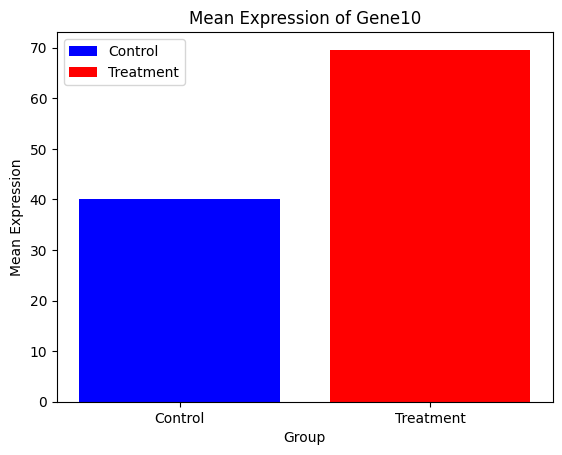

In [82]:
#select the gene
gene = 'Gene10'
gene_data = df[df['Gene'] == gene]

#compute average
control_mean = gene_data[control_col].mean(axis=1).values[0]
treatment_mean = gene_data[treatment_col].mean(axis=1).values[0]

plt.bar('Control', control_mean, color = 'blue', label = 'Control')
plt.bar('Treatment', treatment_mean, color = 'red', label = 'Treatment')
plt.xlabel('Group')
plt.ylabel('Mean Expression')
plt.title(f'Mean Expression of {gene}')
plt.legend()
plt.show()

###Box plot

/tmp/ipython-input-665658060.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Expression', data=box_plot_df, palette='Set3')


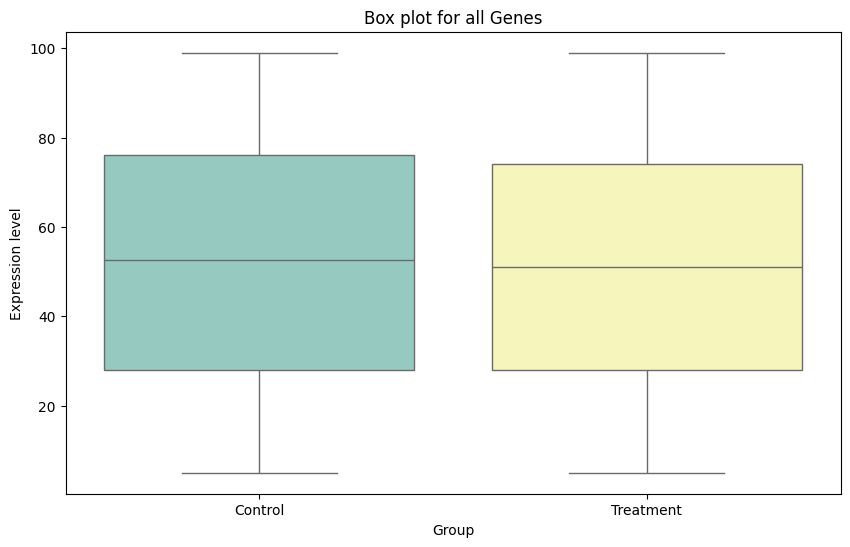

In [83]:
control_data = df[control_col].values.flatten()
treatment_data = df[treatment_col].values.flatten()

# Create a DataFrame suitable for seaborn.boxplot
box_plot_df = pd.DataFrame({
    'Group': ['Control'] * len(control_data) + ['Treatment'] * len(treatment_data),
    'Expression': np.concatenate([control_data, treatment_data])
})

plt.figure(figsize = (10,6))
sns.boxplot(x='Group', y='Expression', data=box_plot_df, palette='Set3')

plt.title(f"Box plot for all Genes")
plt.ylabel('Expression level')
plt.show()

###Violine plot

/tmp/ipython-input-1195478696.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Expression', data=violin_plot_df, palette='Set3')


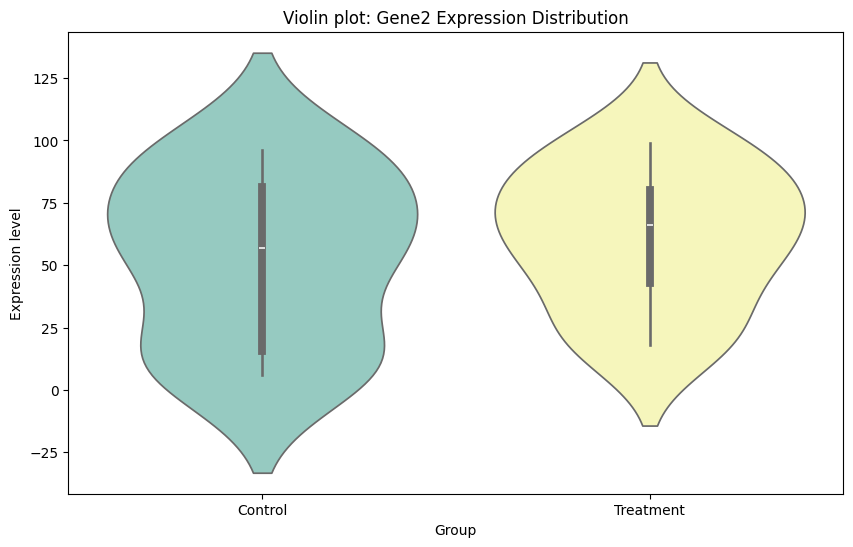

In [84]:
gene = 'Gene2'
gene_row = df[df["Gene"] == gene].iloc[0]

control_data = gene_row[control_col].values
treatment_data = gene_row[treatment_col].values

# Create a DataFrame suitable for seaborn.violinplot
violin_plot_df = pd.DataFrame({
    'Group': ['Control'] * len(control_data) + ['Treatment'] * len(treatment_data),
    'Expression': np.concatenate([control_data, treatment_data])
})

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Expression', data=violin_plot_df, palette='Set3')

plt.title(f"Violin plot: {gene} Expression Distribution")
plt.ylabel("Expression level")
plt.show()

###Heatmap

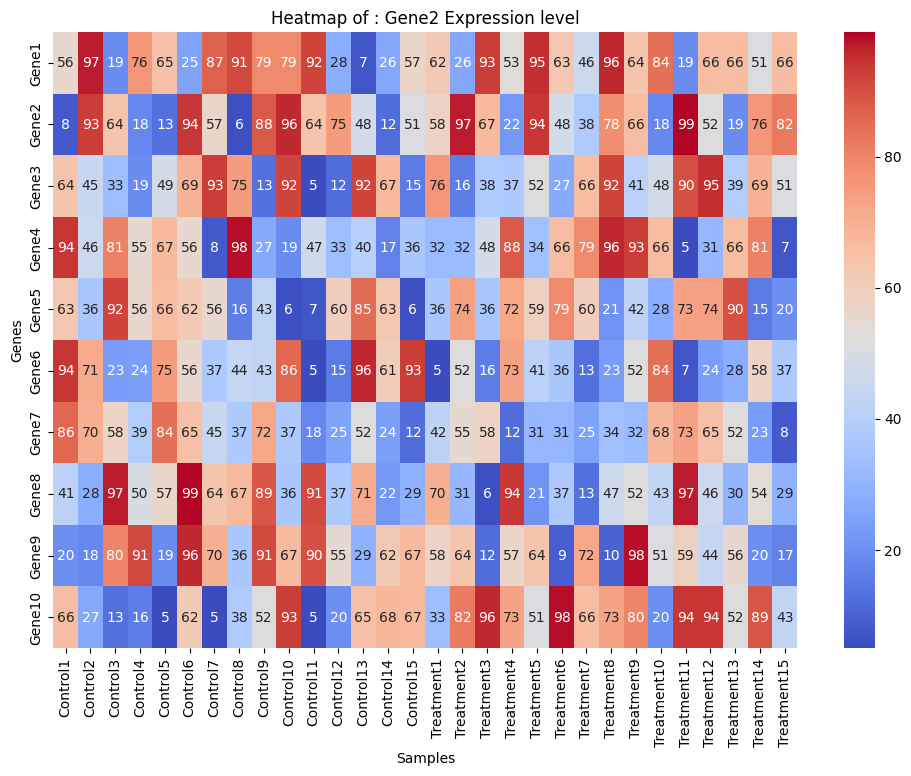

In [86]:
heatmap_data = df.set_index('Gene') #set gene as row
heatmap = heatmap_data.head(10)

plt.figure(figsize = (12,8))
sns.heatmap(heatmap, cmap = "coolwarm", annot = True)
plt.title(f"Heatmap of : {gene} Expression level")
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()

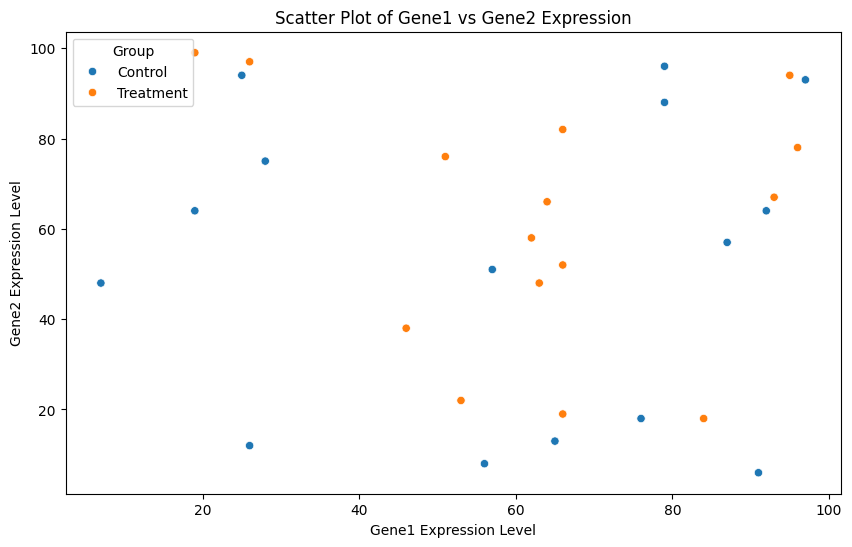

In [85]:
# Select two genes for the scatter plot
gene1_expression = df[df['Gene'] == 'Gene1'].iloc[0, 1:].values
gene2_expression = df[df['Gene'] == 'Gene2'].iloc[0, 1:].values

# Create group labels
groups = ['Control'] * 15 + ['Treatment'] * 15

# Create a DataFrame for seaborn
scatter_df = pd.DataFrame({
    'Gene1 Expression': gene1_expression,
    'Gene2 Expression': gene2_expression,
    'Group': groups
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gene1 Expression', y='Gene2 Expression', hue='Group', data=scatter_df)

plt.title('Scatter Plot of Gene1 vs Gene2 Expression')
plt.xlabel('Gene1 Expression Level')
plt.ylabel('Gene2 Expression Level')
plt.show()